In [2]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import pandas as pd
import pickle
from datetime import datetime
from glob import glob
from scipy.interpolate import interp1d

In [3]:
dir = "//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/"

In [33]:
f38_v1_1 = ert.load(dir + 'raw_data/kamik_f38_v1_01.txt')
f38_v1_2 = ert.load(dir + 'raw_data/kamik_f38_v1_02.txt')
f38_v1_3 = ert.load(dir + 'raw_data/kamik_f38_v1_03.txt')
f38_v1_4 = ert.load(dir + 'raw_data/kamik_f38_v1_04.txt')
f38_diag1_1 = ert.load(dir + 'raw_data/kamik_f38_diag1_01.txt')
f38_diag1_2 = ert.load(dir + 'raw_data/kamik_f38_diag1_02.txt')
f38_v1_topo = pd.read_csv(dir + 'topo_data/kamik_f38_v1_topo.txt', sep='\s+', header=None)
f38_diag1_topo = pd.read_csv(dir + 'topo_data/kamik_f38_diag1_topo.txt', sep='\s+', header=None)


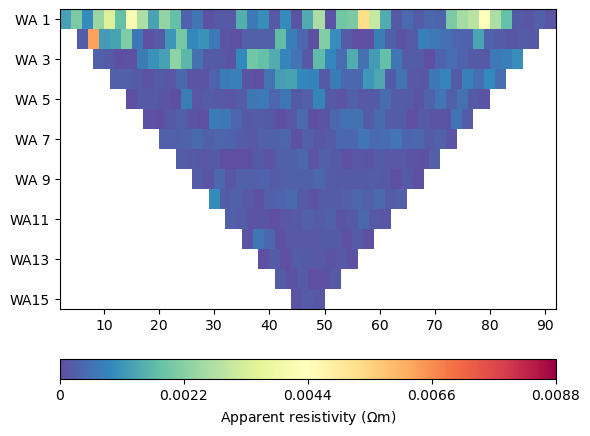

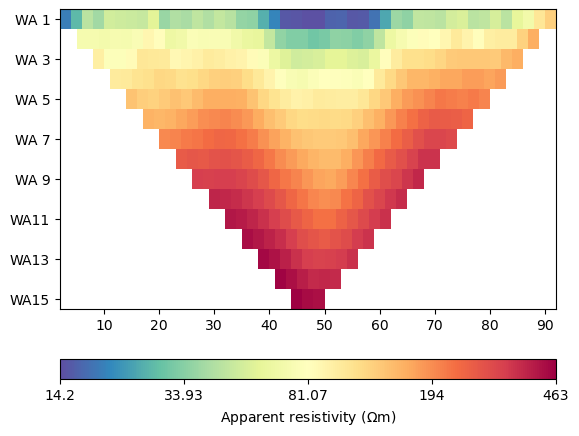

In [5]:
ert.show(f38_diag1_1, f38_diag1_1['err'])
ert.showData(f38_diag1_1)
f38_diag1_1['err'] = f38_diag1_1['err'] + 0.02

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x157cee8cc10>)

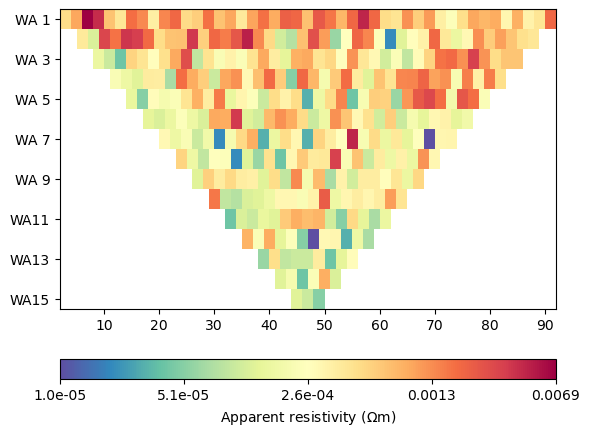

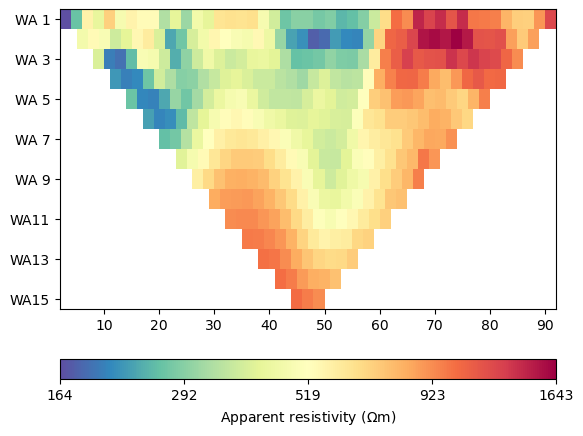

In [6]:
ert.show(f38_diag1_2, f38_diag1_2['err'])
f38_diag1_2['err'] = f38_diag1_2['err'] + 2
ert.showData(f38_diag1_2)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x226fe54a350>)

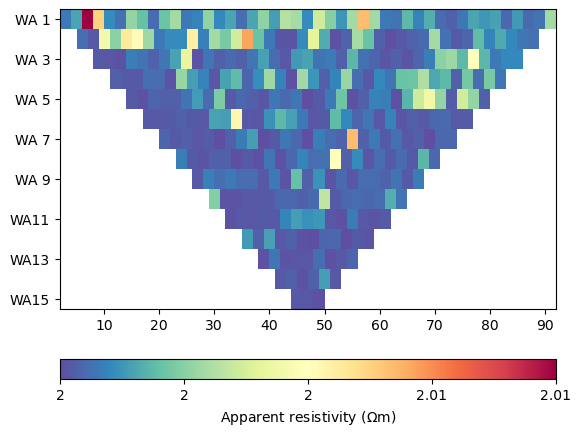

In [6]:
ert.show(f38_diag1_2, f38_diag1_2['err'])

In [7]:
f38_diag1_2['rhoa']

405 [164.64,...,1241.289]

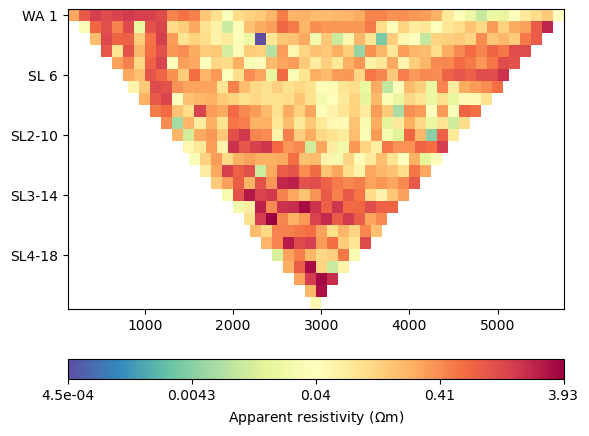

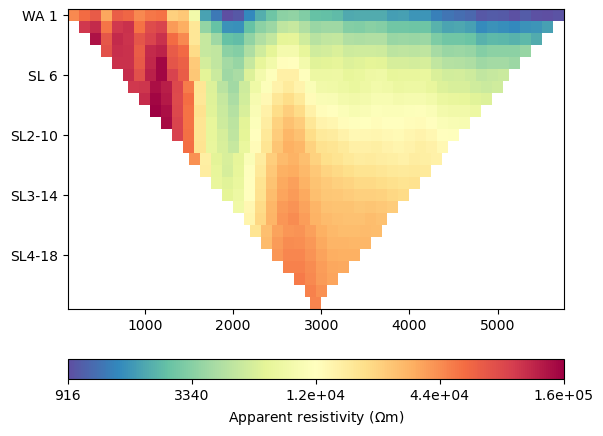

In [34]:
ert.show(f38_v1_1, f38_v1_1['err'])
ert.showData(f38_v1_1)
f38_v1_1['err'] = f38_v1_1['err']/100

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1585af9ba50>)

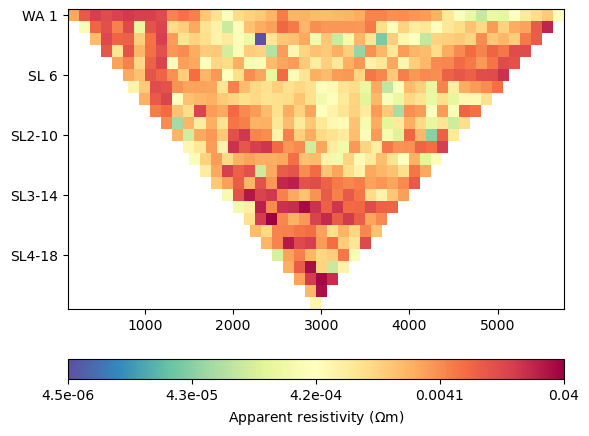

In [35]:
ert.show(f38_v1_1, f38_v1_1['err'])

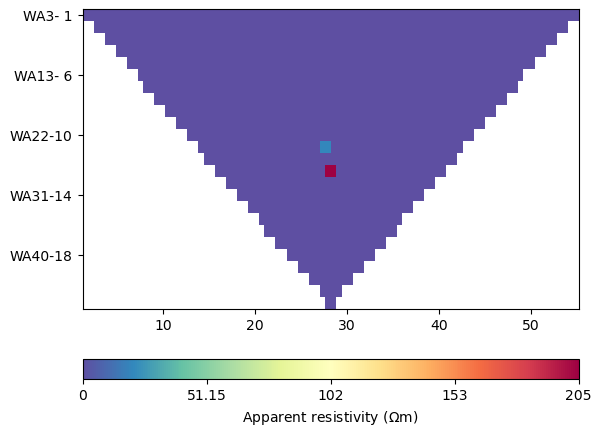

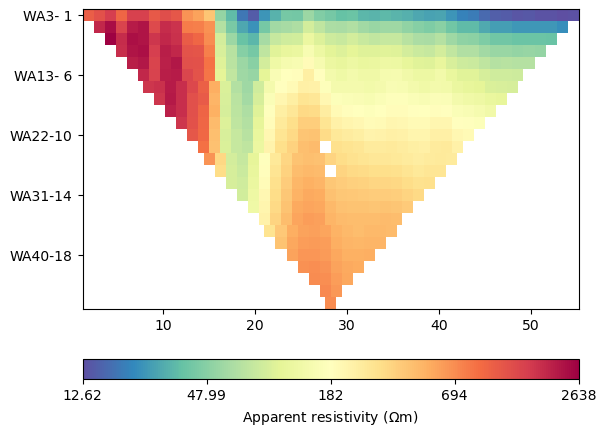

In [8]:
ert.show(f38_v1_2, f38_v1_2['err'])
f38_v1_2.markInvalid(f38_v1_2['err']>20)
ert.showData(f38_v1_2)
f38_v1_2['err'] = f38_v1_2['err'] +0.02

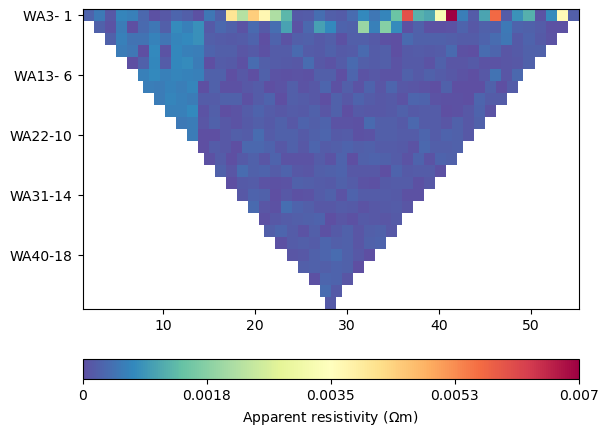

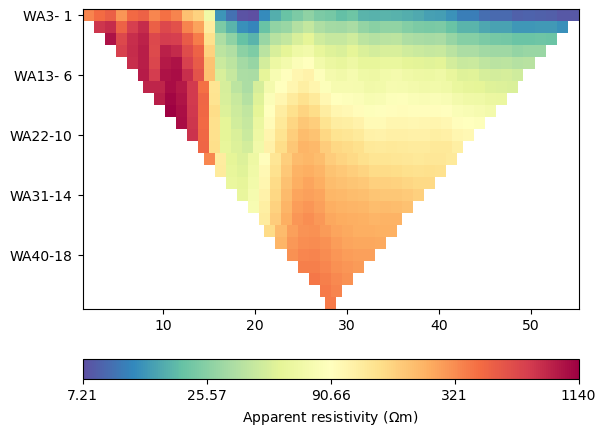

In [9]:
ert.show(f38_v1_3, f38_v1_3['err'])
ert.showData(f38_v1_3)
f38_v1_3['err'] = f38_v1_3['err'] +0.02

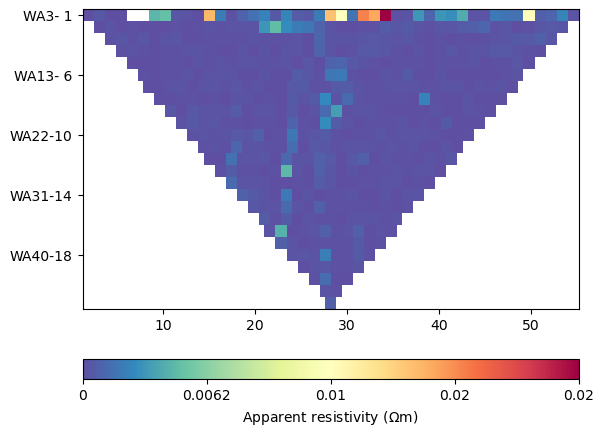

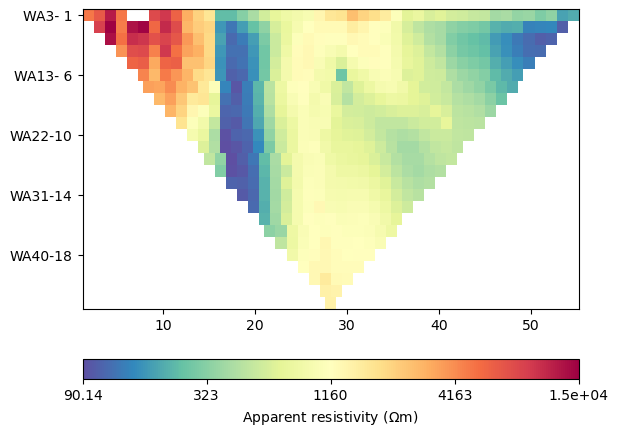

In [10]:
ert.show(f38_v1_4, f38_v1_4['err'])
ert.showData(f38_v1_4)
f38_v1_4['err'] = f38_v1_4['err'] +0.02

In [42]:
v1 = [f38_v1_1, f38_v1_2, f38_v1_3, f38_v1_4]
diag1 = [f38_diag1_1, f38_diag1_2]

In [43]:
for data in diag1:
    data["k0"] = ert.createGeometricFactors(data)
    data["r"] = data["rhoa"]/data["k0"]

for data in v1:
    data["k0"] = ert.createGeometricFactors(data)
    data["r"] = data["rhoa"]/data["k0"]

26/08/25 - 04:33:21 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:21 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\5767846134732496936
26/08/25 - 04:33:21 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:21 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\6347305511576968573
26/08/25 - 04:33:21 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:21 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\8280854193276741436
26/08/25 - 04:33:21 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:21 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\5419567391359779674
26/08/25 - 04:33:21 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:21 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\6922505540113083112
26/08/25 - 04:33:21 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:21 - pyGIMLi -

In [44]:
for data in diag1:
    for i in range(data.sensorCount()):
        x_new = f38_diag1_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = f38_diag1_topo[1][i]  # Get y-value from diag1_topo[1]
        data.setSensorPosition(i, [x_new, y_new])

for data in v1:
    for i in range(data.sensorCount()):
        x_new = f38_v1_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = f38_v1_topo[1][i]  # Get y-value from diag1_topo[1]
        data.setSensorPosition(i, [x_new, y_new])

In [45]:
for data in diag1:
    data["k"] = ert.createGeometricFactors(data, numerical=True)
    data["rhoa"] = data["r"]*data["k"]

for data in v1:
    data["k"] = ert.createGeometricFactors(data, numerical=True)
    data["rhoa"] = data["r"]*data["k"]

26/08/25 - 04:33:31 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
26/08/25 - 04:33:34 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:34 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\3370197031575635755
26/08/25 - 04:33:34 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
26/08/25 - 04:33:37 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:37 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\4073764425100155916
26/08/25 - 04:33:37 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
26/08/25 - 04:33:40 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:40 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\5591294844440720318
26/08/25 - 04:33:40 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
26/08/25 - 04:33:43 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 04:33:43 - p

In [66]:
struct = pd.read_csv(dir + "inversions/kamik_pandas_veg_struct.txt", header=None, sep="\s+")

In [67]:

interpolated_topography = interp1d(f38_diag1_topo[0], f38_diag1_topo[1], kind='cubic', fill_value='extrapolate')

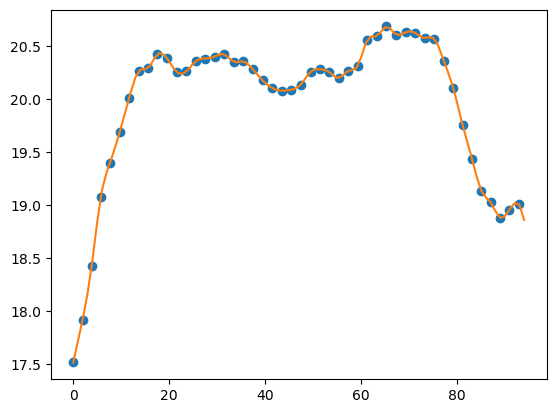

In [68]:
xnew = np.arange(0, 95, 1)

ynew = interpolated_topography(xnew)
plt.plot(f38_diag1_topo[0], f38_diag1_topo[1], 'o', xnew, ynew, '-')

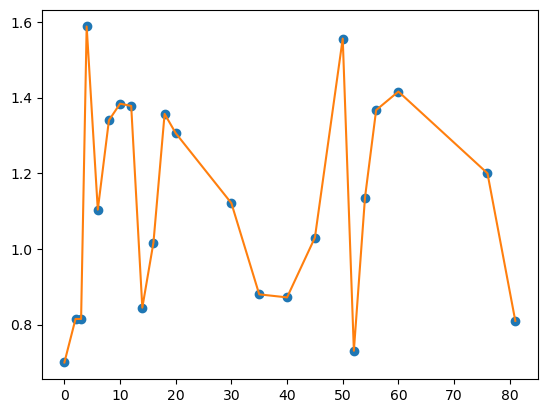

In [69]:
xnew_struct = np.arange(0, 82, 1)
interpolated_struct = interp1d(struct[0], struct[1], kind='linear', fill_value='extrapolate')
ynew_struct = interpolated_struct(xnew_struct)
plt.plot(struct[0], struct[1], 'o', xnew_struct, ynew_struct, '-')



23/07/25 - 10:39:54 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 10:39:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 10:39:54 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 10:39:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 10:39:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/07/25 - 10:39:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/07/25 - 10:39:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4520 Cells: 8772 Boundaries: 6712
23/07/25 - 10:39:55 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 10:39:55 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 10:39:55 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  239.62 (dPhi = 85.55%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  144.04 (dPhi = 39.32%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.82 (dPhi = 93.58%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.57 (dPhi = 5.59%) lam: 20.0

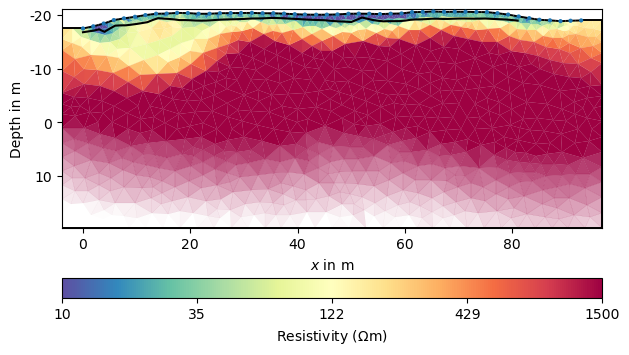

In [116]:
mgr = ert.Manager(f38_diag1_1)
mgr.invert(zWeight=0.5, verbose=True, paraMaxCellSize=5.0, lam=20)
ax, cb = mgr.showResult(cMin=10, cMax=1500)
ax.plot(xnew_struct, ynew[:82] - ynew_struct, "k-")

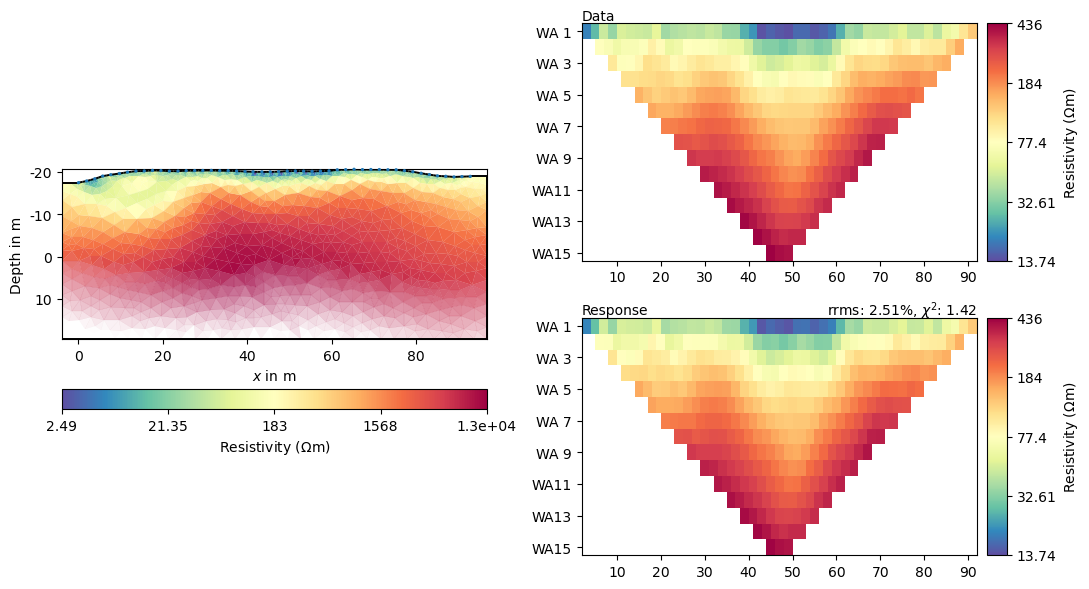

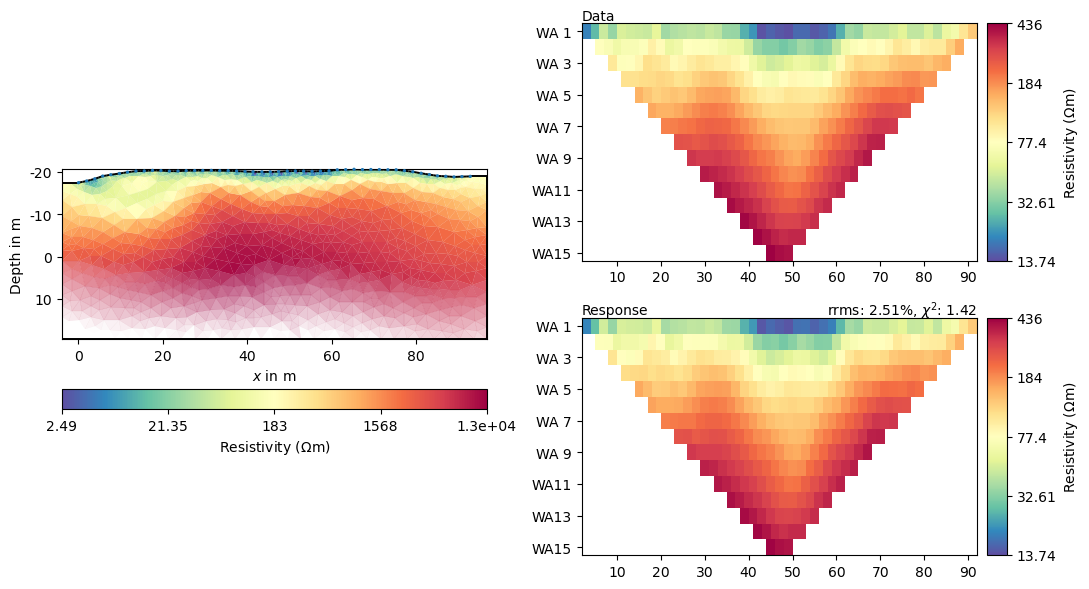

In [117]:
mgr.showResultAndFit()

23/07/25 - 11:26:24 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:26:24 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:26:24 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  265.21 (dPhi = 81.19%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   33.55 (dPhi = 64.61%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   38.09 (dPhi = 5.88%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

23/07/25 - 11:27:07 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:27:07 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:27:07 - pyGIMLi - INFO - Starting inversion.


chi² =   28.96 (dPhi = 1.55%) lam: 1000.0
################################################################################
#                Abort criterion reached: dPhi = 1.55 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  265.19 (dPhi = 81.52%) lam: 853.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   33.31 (dPhi = 66.8

23/07/25 - 11:27:52 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:27:52 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:27:52 - pyGIMLi - INFO - Starting inversion.


chi² =   33.16 (dPhi = 9.08%) lam: 853.2
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   27.40 (dPhi = 1.14%) lam: 853.2
################################################################################
#                Abort criterion reached: dPhi = 1.14 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  265.52 (dPhi = 81.79%

23/07/25 - 11:28:36 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:28:36 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:28:36 - pyGIMLi - INFO - Starting inversion.


chi² =   25.91 (dPhi = 0.41%) lam: 727.9
################################################################################
#                Abort criterion reached: dPhi = 0.41 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  266.30 (dPhi = 82.00%) lam: 621.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   35.58 (dPhi = 70.43

23/07/25 - 11:29:21 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:29:21 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:29:21 - pyGIMLi - INFO - Starting inversion.


chi² =   22.33 (dPhi = 0.07%) lam: 621.0
################################################################################
#                Abort criterion reached: dPhi = 0.07 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  267.63 (dPhi = 82.15%) lam: 529.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   37.90 (dPhi = 71.68

23/07/25 - 11:30:01 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:30:01 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:30:01 - pyGIMLi - INFO - Starting inversion.


chi² =   18.66 (dPhi = 0.04%) lam: 529.8
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  269.59 (dPhi = 82.23%) lam: 452.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   41.04 (dPhi = 72.54

23/07/25 - 11:30:52 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:30:52 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:30:52 - pyGIMLi - INFO - Starting inversion.


chi² =   15.55 (dPhi = 0.01%) lam: 452.0
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  272.22 (dPhi = 82.24%) lam: 385.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   44.56 (dPhi = 73.14

23/07/25 - 11:31:44 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:31:44 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:31:44 - pyGIMLi - INFO - Starting inversion.


chi² =   13.09 (dPhi = 36.44%) lam: 385.7
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   13.37 (dPhi = 0.05%) lam: 385.7
################################################################################
#                Abort criterion reached: dPhi = 0.05 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  275.57 (dPhi = 82.20

23/07/25 - 11:32:16 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:32:16 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:32:16 - pyGIMLi - INFO - Starting inversion.


chi² =   11.27 (dPhi = 42.88%) lam: 329.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   11.42 (dPhi = 0.11%) lam: 329.0
################################################################################
#                Abort criterion reached: dPhi = 0.11 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  230.38 (dPhi = 85.17

23/07/25 - 11:32:54 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:32:54 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:32:54 - pyGIMLi - INFO - Starting inversion.


chi² =    9.91 (dPhi = 0.37%) lam: 280.7
################################################################################
#                Abort criterion reached: dPhi = 0.37 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  232.87 (dPhi = 85.13%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   63.22 (dPhi = 65.66

23/07/25 - 11:33:32 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:33:32 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:33:32 - pyGIMLi - INFO - Starting inversion.


chi² =    8.51 (dPhi = 57.64%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    8.81 (dPhi = 0.62%) lam: 239.5
################################################################################
#                Abort criterion reached: dPhi = 0.62 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  229.11 (dPhi = 85.47

23/07/25 - 11:34:26 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:34:26 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:34:26 - pyGIMLi - INFO - Starting inversion.


chi² =    7.85 (dPhi = 1.04%) lam: 204.3
################################################################################
#                Abort criterion reached: dPhi = 1.04 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  232.20 (dPhi = 85.38%) lam: 174.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   75.80 (dPhi = 62.29

23/07/25 - 11:35:32 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:35:32 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:35:32 - pyGIMLi - INFO - Starting inversion.


chi² =    7.09 (dPhi = 1.23%) lam: 174.3
################################################################################
#                Abort criterion reached: dPhi = 1.23 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  235.65 (dPhi = 85.25%) lam: 148.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   82.44 (dPhi = 60.82

23/07/25 - 11:36:43 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:36:43 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:36:43 - pyGIMLi - INFO - Starting inversion.


chi² =    6.47 (dPhi = 0.92%) lam: 148.7
################################################################################
#                Abort criterion reached: dPhi = 0.92 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  232.25 (dPhi = 85.53%) lam: 126.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   89.71 (dPhi = 57.85

23/07/25 - 11:37:41 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:37:41 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:37:41 - pyGIMLi - INFO - Starting inversion.


chi² =    5.76 (dPhi = 1.81%) lam: 126.9
################################################################################
#                Abort criterion reached: dPhi = 1.81 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  235.85 (dPhi = 85.38%) lam: 108.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   96.77 (dPhi = 56.06

23/07/25 - 11:38:42 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:38:42 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:38:42 - pyGIMLi - INFO - Starting inversion.


chi² =    5.39 (dPhi = 1.17%) lam: 108.3
################################################################################
#                Abort criterion reached: dPhi = 1.17 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  232.55 (dPhi = 85.65%) lam: 92.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  103.49 (dPhi = 53.04%

23/07/25 - 11:39:53 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:39:53 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:39:53 - pyGIMLi - INFO - Starting inversion.


chi² =    5.71 (dPhi = 0.82%) lam: 92.4
################################################################################
#                Abort criterion reached: dPhi = 0.82 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  236.06 (dPhi = 85.49%) lam: 78.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  110.28 (dPhi = 51.24%)

23/07/25 - 11:41:10 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:41:10 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:41:10 - pyGIMLi - INFO - Starting inversion.


chi² =    5.46 (dPhi = 1.06%) lam: 78.8
################################################################################
#                Abort criterion reached: dPhi = 1.06 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  232.37 (dPhi = 85.76%) lam: 67.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  116.71 (dPhi = 48.04%)

23/07/25 - 11:42:56 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:42:56 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:42:56 - pyGIMLi - INFO - Starting inversion.


chi² =    5.29 (dPhi = 1.43%) lam: 67.2
################################################################################
#                Abort criterion reached: dPhi = 1.43 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  235.35 (dPhi = 85.62%) lam: 57.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  123.52 (dPhi = 46.07%)

23/07/25 - 11:44:14 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:44:14 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:44:14 - pyGIMLi - INFO - Starting inversion.


chi² =    5.07 (dPhi = 1.80%) lam: 57.4
################################################################################
#                 Abort criterion reached: dPhi = 1.8 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  238.23 (dPhi = 85.49%) lam: 48.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  129.82 (dPhi = 44.30%)

23/07/25 - 11:45:28 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:45:28 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:45:28 - pyGIMLi - INFO - Starting inversion.


chi² =    4.76 (dPhi = 1.17%) lam: 48.9
################################################################################
#                Abort criterion reached: dPhi = 1.17 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  234.12 (dPhi = 85.77%) lam: 41.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  133.71 (dPhi = 41.83%)

23/07/25 - 11:47:22 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:47:22 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:47:22 - pyGIMLi - INFO - Starting inversion.


chi² =    2.82 (dPhi = -0.01%) lam: 41.8
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  236.82 (dPhi = 85.64%) lam: 35.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  138.07 (dPhi = 40.79%

23/07/25 - 11:48:59 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:48:59 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:48:59 - pyGIMLi - INFO - Starting inversion.


chi² =    2.46 (dPhi = -0.01%) lam: 35.6
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  239.46 (dPhi = 85.50%) lam: 30.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  141.90 (dPhi = 39.96%

23/07/25 - 11:49:59 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:49:59 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:49:59 - pyGIMLi - INFO - Starting inversion.


chi² =    4.27 (dPhi = 1.59%) lam: 30.4
################################################################################
#                Abort criterion reached: dPhi = 1.59 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  235.12 (dPhi = 85.79%) lam: 25.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  142.69 (dPhi = 38.61%)

23/07/25 - 11:51:21 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:51:21 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:51:21 - pyGIMLi - INFO - Starting inversion.


chi² =    1.85 (dPhi = -0.00%) lam: 25.9
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  237.88 (dPhi = 85.64%) lam: 22.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  143.38 (dPhi = 39.11%

23/07/25 - 11:52:27 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:52:27 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:52:27 - pyGIMLi - INFO - Starting inversion.


chi² =    4.21 (dPhi = 0.99%) lam: 22.1
################################################################################
#                Abort criterion reached: dPhi = 0.99 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  240.63 (dPhi = 85.50%) lam: 18.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  144.79 (dPhi = 39.28%)

23/07/25 - 11:54:10 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:54:10 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:54:10 - pyGIMLi - INFO - Starting inversion.


chi² =    1.35 (dPhi = 0.01%) lam: 18.9
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  236.61 (dPhi = 85.76%) lam: 16.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  144.44 (dPhi = 38.46%)

23/07/25 - 11:55:59 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:55:59 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:55:59 - pyGIMLi - INFO - Starting inversion.


chi² =    1.17 (dPhi = 9.39%) lam: 16.1
--------------------------------------------------------------------------------
inv.iter 10 ... chi² =    1.17 (dPhi = 0.07%) lam: 16.1
################################################################################
#                Abort criterion reached: dPhi = 0.07 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  239.05 (dPhi = 85.62%)

23/07/25 - 11:57:45 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:57:45 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:57:45 - pyGIMLi - INFO - Starting inversion.


chi² =    1.02 (dPhi = 0.30%) lam: 13.7
################################################################################
#                 Abort criterion reached: dPhi = 0.3 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  241.19 (dPhi = 85.51%) lam: 11.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  140.78 (dPhi = 41.24%)

23/07/25 - 11:59:19 - pyGIMLi - INFO - Use median(data values)=126.38123549962083
23/07/25 - 11:59:19 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=126.381235/126.381235
23/07/25 - 11:59:19 - pyGIMLi - INFO - Starting inversion.


chi² =    0.92 (dPhi = 36.01%) lam: 11.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.92)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002600ECC22F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 13.74/436
min/max (error): 2%/2.88%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1675.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  243.91 (dPhi = 85.35%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  134.28 (dPhi = 44.5

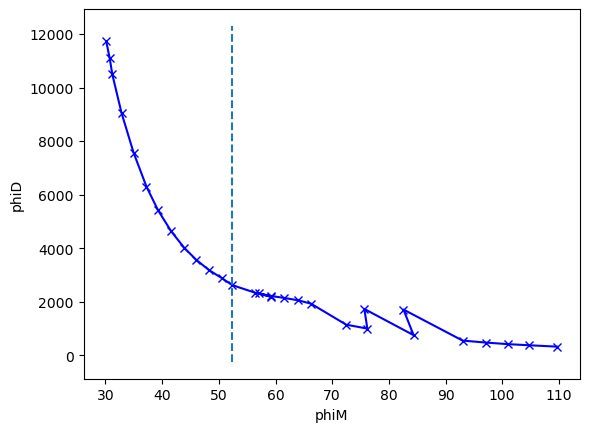

In [118]:

lambdas = np.logspace(np.log10(1000), np.log10(10), num=30)
phiD = []
phiM = []

for lam in lambdas:
    mgr.invert(f38_diag1_1, zWeight=0.5, lam=lam, verbose=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

phiD = np.array(phiD)
phiM = np.array(phiM)

from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, S=1.0, curve="convex", direction="decreasing",interp_method='interp1d')

print(round(kneedle.elbow, 3))
print(round(kneedle.knee_y, 3))
print(lambdas[np.where(phiM==kneedle.knee)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')


In [122]:
lambdas

array([1000.        ,  853.16785242,  727.8953844 ,  621.01694189,
        529.83169063,  452.03536564,  385.66204212,  329.03445623,
        280.72162039,  239.502662  ,  204.33597179,  174.33288222,
        148.73521073,  126.89610032,  108.26367339,   92.36708572,
         78.80462816,   67.23357536,   57.3615251 ,   48.93900918,
         41.75318937,   35.6224789 ,   30.39195382,   25.92943797,
         22.12216291,   18.87391822,   16.10262028,   13.73823796,
         11.72102298,   10.        ])

82.584
1705.974
[22.12216291]


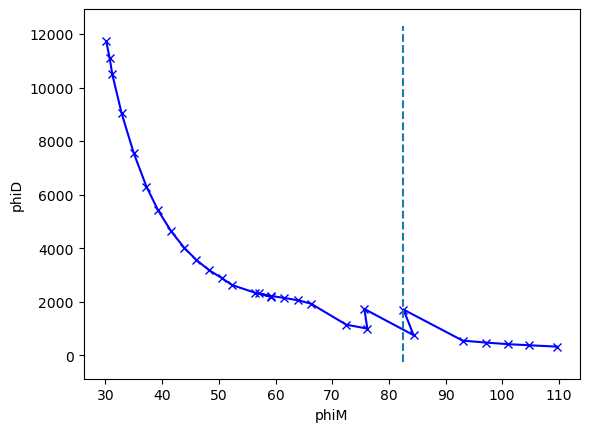

In [121]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')



In [109]:
lambdas

array([1000.        ,  784.75997035,  615.84821107,  483.29302386,
        379.26901907,  297.63514416,  233.57214691,  183.29807108,
        143.84498883,  112.88378917,   88.58667904,   69.51927962,
         54.55594781,   42.81332399,   33.59818286,   26.36650899,
         20.69138081,   16.23776739,   12.74274986,   10.        ])

23/07/25 - 14:56:13 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/f38_diag1_1\ERTManager


('//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/f38_diag1_1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

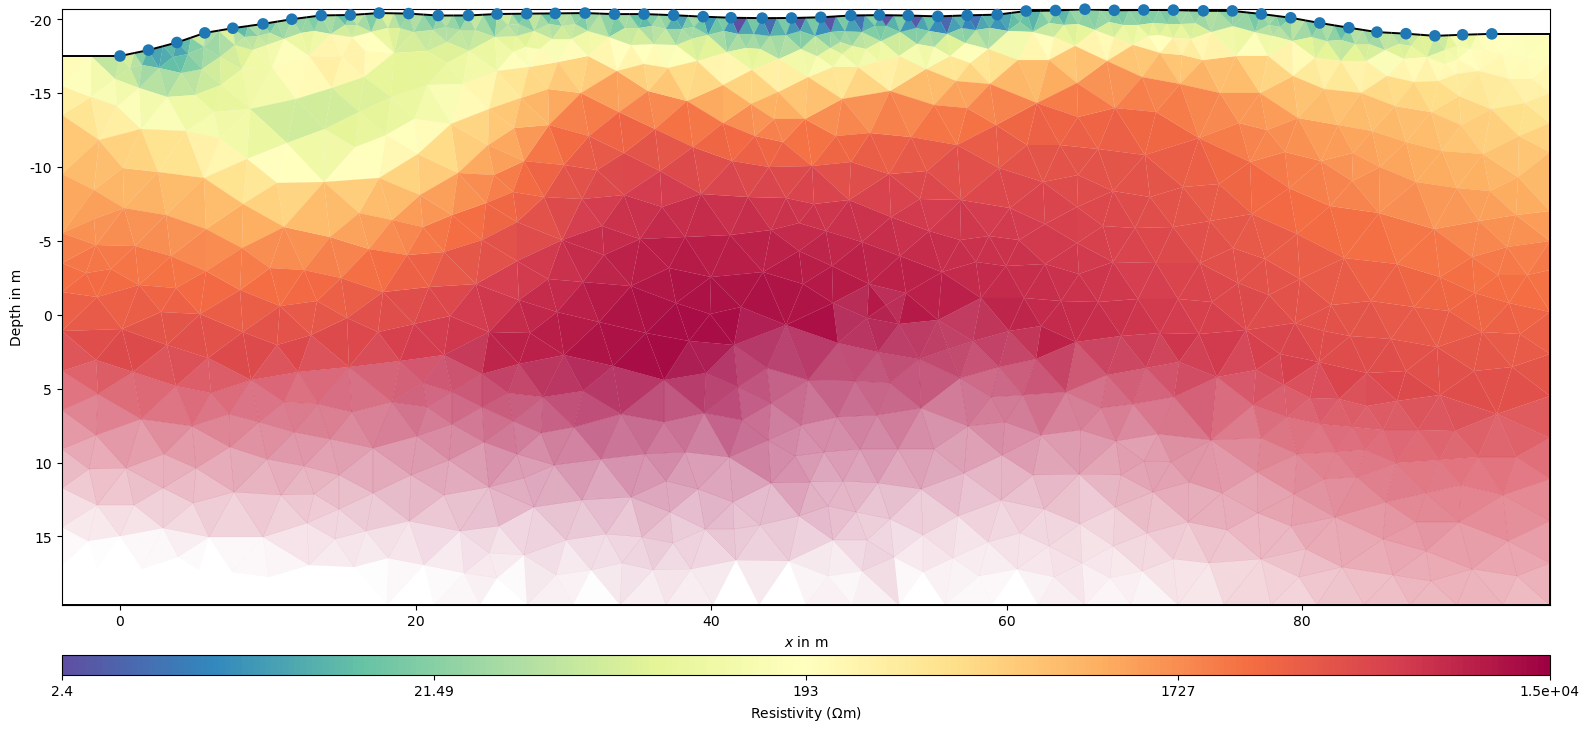

In [123]:
mgr.saveResult(dir + 'inversions/saved/f38_diag1_1')

In [26]:
struct_new = np.column_stack((xnew_struct, ynew[:82] - ynew_struct))

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x25ff096edd0>)

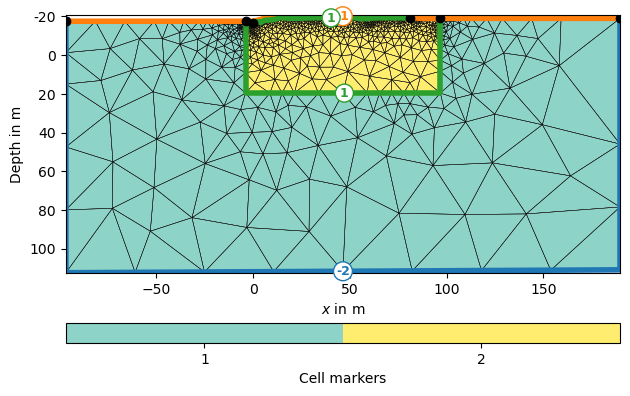

In [28]:
plc = mt.createParaMeshPLC(f38_diag1_1, boundary=1)
line = mt.createPolygon(struct_new, marker=1)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

(10.0, 20.682)

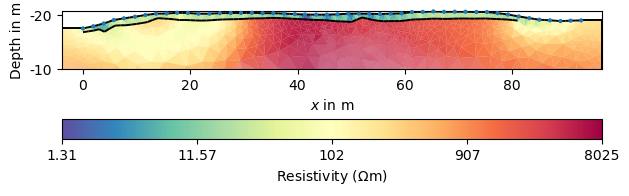

In [32]:
ax, cb = mgr.showResult()
ax.set_ylim(10)

In [14]:
f38_diag1_2 = ert.load(dir + 'raw_data/kamik_f38_diag1_02.txt')

In [122]:
rs = pd.read_csv(dir+'raw_data/kamik_f38_diag1_02_rs.csv', header=None)
rs = rs.to_numpy()

In [26]:
f38_diag1_2['err'] = f38_diag1_2['iperr'] + f38_diag1_2['err']

In [ ]:
f38_diag1_2["k0"] = ert.createGeometricFactors(f38_diag1_2)
f38_diag1_2["r"] = f38_diag1_2["rhoa"]/f38_diag1_2["k0"]


for i in range(f38_diag1_2.sensorCount()):
    x_new = f38_diag1_topo[0][i]  # Get x-value from diag1_topo[0]
    y_new = f38_diag1_topo[1][i]  # Get y-value from diag1_topo[1]
    f38_diag1_2.setSensorPosition(i, [x_new, y_new])


f38_diag1_2["k"] = ert.createGeometricFactors(f38_diag1_2, numerical=True)
f38_diag1_2["rhoa"] = f38_diag1_2["r"]*f38_diag1_2["k"]

30/07/25 - 15:12:46 - pyGIMLi - INFO - Save RVector binary
30/07/25 - 15:12:46 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4451000335219752239


30/07/25 - 15:12:46 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
30/07/25 - 15:12:56 - pyGIMLi - INFO - Save RVector binary
30/07/25 - 15:12:56 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5109637815142413370


In [16]:
plc = mt.createParaMeshPLC(f38_v1_1, paraMaxCellSize=1)
mesh = mt.createMesh(plc)

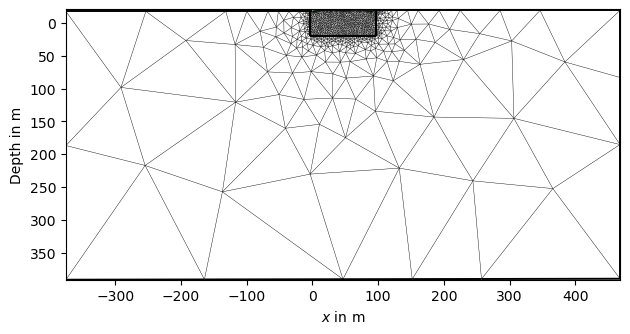

In [72]:
_ = pg.viewer.showMesh(mesh)

In [46]:
mgr = ert.ERTManager(v1[0])
mgr.invert(data=v1[0],verbose=True, lam=30, zWeight=0.5, mesh=mesh)

26/08/25 - 04:34:09 - pyGIMLi - INFO - Found 2 regions.
26/08/25 - 04:34:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/08/25 - 04:34:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/08/25 - 04:34:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/08/25 - 04:34:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7649 Cells: 15032 Boundaries: 11406
26/08/25 - 04:34:09 - pyGIMLi - INFO - Use median(data values)=12180.45635953809
26/08/25 - 04:34:09 - pyGIMLi - INFO - Created startmodel from forward operator:2794, min/max=12180.456360/12180.456360
26/08/25 - 04:34:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001585B9EC360>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 909/1.8e+05
min/max (error): 4.5e-04%/3.93%
min/max (start model): 1.2e+04/1.2e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 93834699.10
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 3630520.81 (dPhi = 96.13%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3213291.61 (dPhi = 11.49%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2908943.50 (dPhi = 9.47%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2750

2794 [1012.716566905615,...,27320.5168102741]

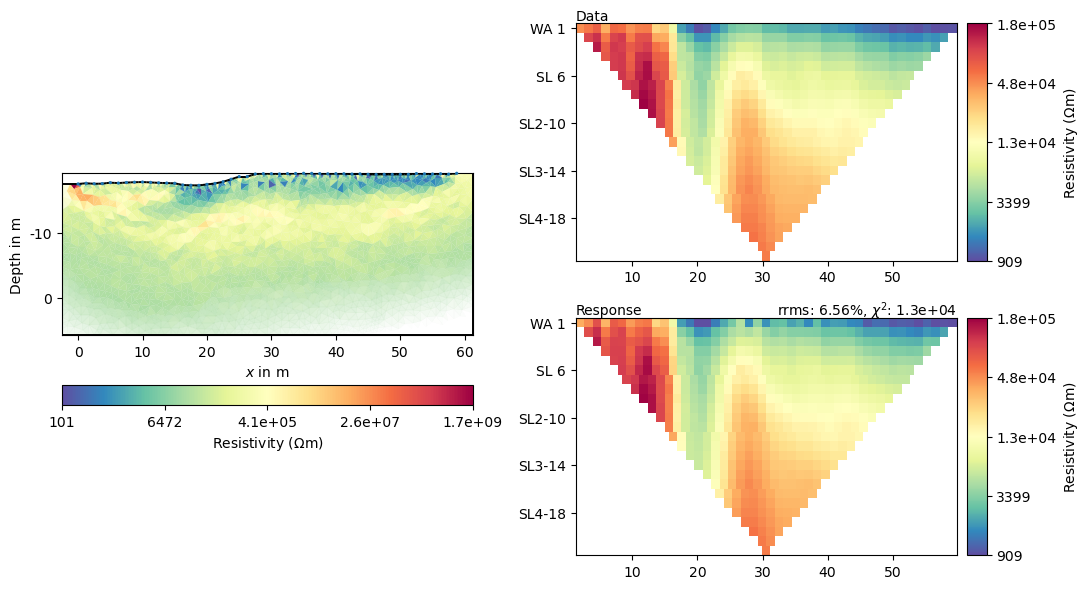

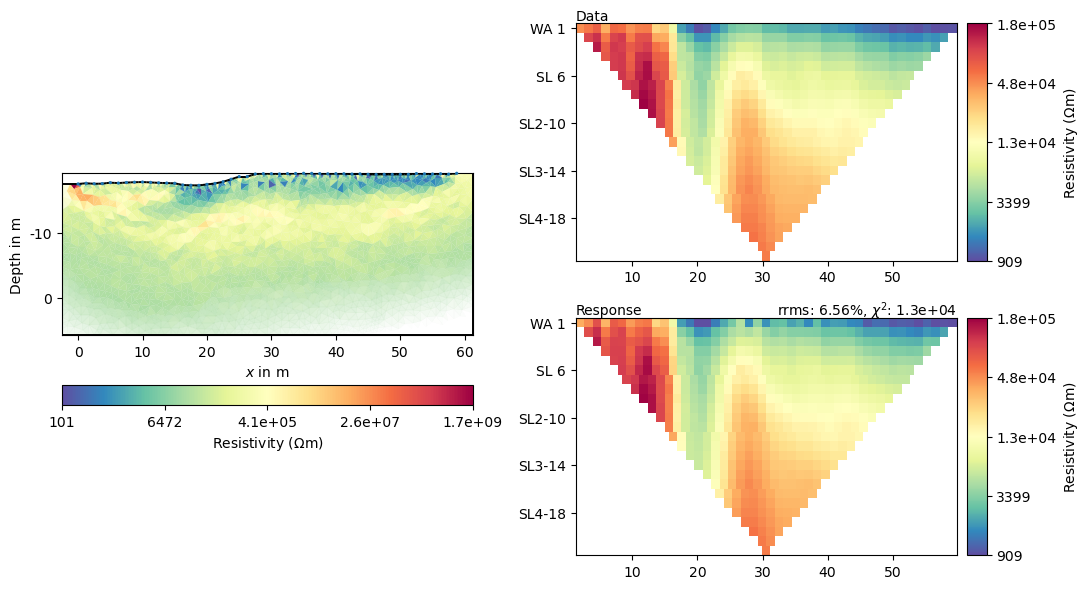

In [47]:
mgr.showResultAndFit()

In [17]:
tl = ert.TimelapseERT(v1, mesh=mesh)


26/08/25 - 03:51:26 - pyGIMLi - INFO - Found 2 regions.
26/08/25 - 03:51:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/08/25 - 03:51:26 - pyGIMLi - INFO - Save RVector binary
26/08/25 - 03:51:26 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\6567331367873283008


26/08/25 - 03:52:16 - pyGIMLi - INFO - Found 2 regions.
26/08/25 - 03:52:16 - pyGIMLi - INFO - Region with smallest marker (1) set to background
26/08/25 - 03:52:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/08/25 - 03:52:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/08/25 - 03:52:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7649 Cells: 15032 Boundaries: 11406
26/08/25 - 03:52:17 - pyGIMLi - INFO - Starting inversion.


2794 model cells
Mesh: Nodes: 7649 Cells: 15032 Boundaries: 11406
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x00000157CA938270>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 3.3/1.6e+05
min/max (error): 3%/1.0e+10%
min/max (start model): 471/471
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 33186.95
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 3835.59 (dPhi = 88.38%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  526.99 (dPhi = 85.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  249.65 (dPhi = 46.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  182.86 (dPhi = 25.48%) lam: 20.0
-----------------

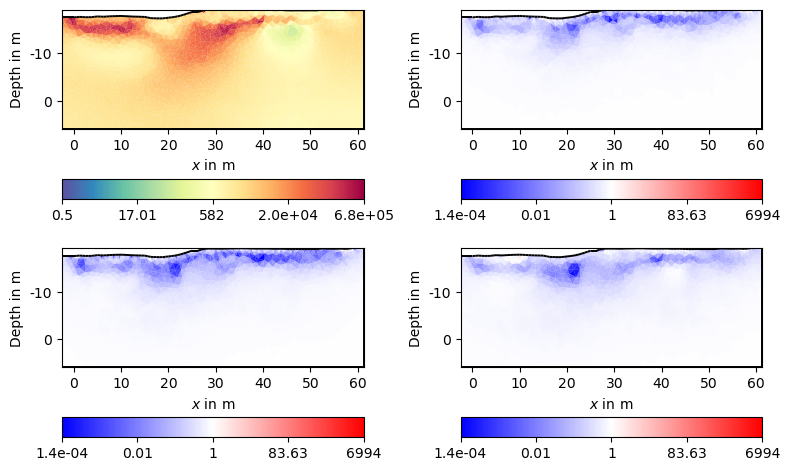

In [18]:

tl.fullInversion(mesh=mesh,zWeight=0.5, lam=20, verbose=True)
ax = tl.showAllModels(ratio=True)

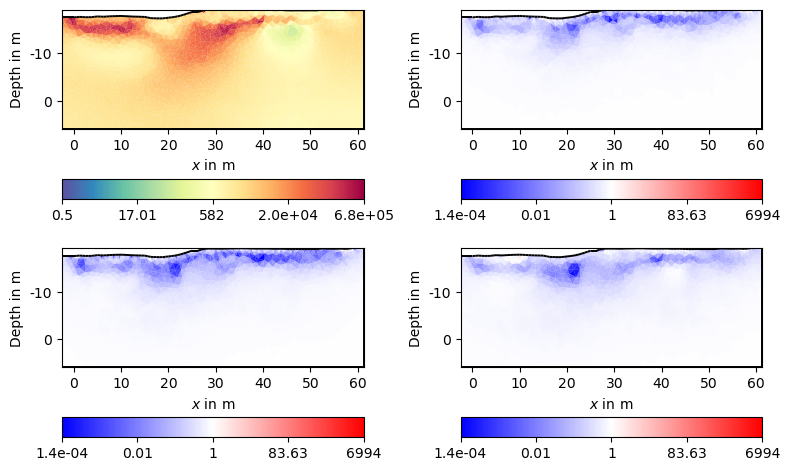

In [24]:
ax = tl.showAllModels(ratio=True, rMin=0.1)